In [1]:
import mylibrary.nnlib as nn

In [36]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Least squares

In [37]:
def regression(x,y):
    n = len(x)
    sy = np.sum(y)
    sx = np.sum(x)
    sx2 = np.sum(np.square(x))
    sxy = np.sum(x*y)

    # y = mx+c
    z = (n*sx2 - sx**2)
    m = (n*sxy - sx*sy)/z
    c = (sy*sx2 - sx*sxy)/z
    return m, c

def output(x, m, c):
    return m*x+c

def error(target, output):
    return np.sqrt(np.square(target-output).mean())

In [38]:
#Define a simple range of values for x and reshape so sklearn likes it.
x = np.linspace(0,1,200)
noise = np.random.normal(0,0.02, x.shape)
x = x + noise
y= 0.5*x + 5
noise = np.random.normal(0,0.1, x.shape)
y = y + noise
x = x + 0.5

In [39]:
n = len(x)

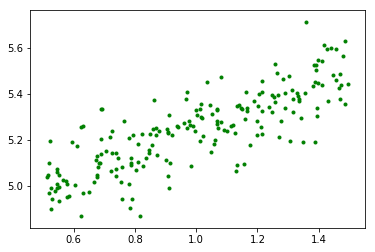

In [40]:
%matplotlib inline
plt.scatter(x, y, marker='.', color='g')

In [41]:
m = np.random.exponential()*2
c = np.random.randn()
print(m,c)
mt, mr = np.copy(m), np.copy(m)
ct, cr = np.copy(c), np.copy(c)

2.31047166057035 -1.0397474514772267


In [42]:
m, c = regression(x, y)
ytarg = m*x+c
learning_rate = 0.3

m, c

(0.48179737620411256, 4.761298537922275)

In [44]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

plt.ion()
fig.show()
fig.canvas.draw()


for step in range(1000):
    # traditional first
    yt = mt*x + ct
    dyt = yt - y
    dct = dyt.mean()
    dmt = x.T.dot(dyt)/n
    
    yr = mr*x + cr
    dyr = yr - y
    dcr = dyr.mean()
    dmr = x.T.dot(dyr)/(x**2).sum()
    
    if step%10==0:
        print('_______________________')
        print("epoch trad, rev", step)
        print("m  c", m, c)
        print("mt mr", mt, mr)
        print("ct cr", ct, cr)
        print("Loss", (dyt**2).mean(), (dyr**2).mean())
        print("dm  ", dmt, dmr)
        print("dc  ", dct, dcr)

        ax.clear()
        plt.scatter(x, y, marker='.', c='g', label='x,y')
        plt.scatter(x, ytarg, marker='*', c='r', lw=1, label='x,ytarg')
        plt.scatter(x, yt, marker='.', c='m', lw=1, label='x,yt')
        plt.scatter(x, yr, marker='.', c='purple', lw=1, label='x,yr')
    #     plt.plot(x, np.zeros_like(x), c='b', lw=1)

        plt.legend()
        fig.canvas.draw()

        plt.pause(1)

    
    mt = mt - learning_rate*dmt
    ct = ct - learning_rate*dct
    mr = mr - learning_rate*dmr
    cr = cr - learning_rate*dcr
###     the revised version does not seem to require learning rate
#     mr = mr - dmr
#     cr = cr - dcr
    
#     print("\n")
    if (dyt**2).mean() < 0.0025:
        print('fitted to our expectation')
        plt.pause(10)
        break

_______________________
epoch trad, rev 0
m  c 0.48179737620411256 4.761298537922275
mt mr 1.572164206485227 1.6015060256867881
ct cr 3.627802683592253 3.5990899003209993
Loss 0.1117721067899815 0.11715736482922608
dm   0.044879107952410846 0.04443357821501166
dc   -0.04665428312504005 -0.04612011207100886




















_______________________
epoch trad, rev 10
m  c 0.48179737620411256 4.761298537922275
mt mr 1.4447669814800521 1.475124460916248
ct cr 3.760239054899775 3.7302684406294535
Loss 0.08936964950543573 0.09432320944044868
dm   0.039635483829719084 0.039418358277430926
dc   -0.041203249546548616 -0.040914532982537964




















_______________________
epoch trad, rev 20
m  c 0.48179737620411256 4.761298537922275
mt mr 1.3322547038965031 1.3630075889488127
ct cr 3.8772017106413315 3.8466408532937586
Loss 0.0718963245409871 0.07635273923171482
dm   0.03500451880821185 0.03496920643593213
dc   -0.0363891085550506 -0.036296507835927284




















_________





















_______________________
epoch trad, rev 250
m  c 0.48179737620411256 4.761298537922275
mt mr 0.5306144036707918 0.5378745531080199
ct cr 4.710550572450945 4.703092879334105
Loss 0.010159067958292118 0.010223864653168754
dm   0.002009291354752541 0.002225319619695621
dc   -0.002088768070986484 -0.0023097845003068863




















_______________________
epoch trad, rev 260
m  c 0.48179737620411256 4.761298537922275
mt mr 0.5249106774939301 0.5315451196716473
ct cr 4.716479907236414 4.709662554592284
Loss 0.010114163128230071 0.010166592017500945
dm   0.0017745280295001237 0.0019741476958375337
dc   -0.0018447187762596462 -0.0020490790216387642




















_______________________
epoch trad, rev 270
m  c 0.48179737620411256 4.761298537922275
mt mr 0.5198733682209402 0.5259300896670688
ct cr 4.721716465263807 4.715490710313619
Loss 0.010079138546855746 0.010121518478518655
dm   0.0015671941851697205 0.0017513255581291533
dc   -0.0016291839246083794 -0.001





















_______________________
epoch trad, rev 500
m  c 0.48179737620411256 4.761298537922275
mt mr 0.48398297292669706 0.484605829787961
ct cr 4.759026490795125 4.758383485854979
Loss 0.009955388684055863 0.009955654014676034
dm   8.995837779511628e-05 0.00011144831473706972
dc   -9.351664546367378e-05 -0.00011567847948077858




















_______________________
epoch trad, rev 510
m  c 0.48179737620411256 4.761298537922275
mt mr 0.48372761028202915 0.48428883950778756
ct cr 4.75929195420711 4.758712507910692
Loss 0.00995529867411913 0.009955510363433381
dm   7.944774286107959e-05 9.886913852527311e-05
dc   -8.259026656730395e-05 -0.0001026218443877669




















_______________________
epoch trad, rev 520
m  c 0.48179737620411256 4.761298537922275
mt mr 0.4835020839194245 0.4840076279345515
ct cr 4.759526401174823 4.7590043932324315
Loss 0.009955228468745915 0.00995539730996885
dm   7.016515860391939e-05 8.770977448889006e-05
dc   -7.294051340068552e-05 -





















_______________________
epoch trad, rev 740
m  c 0.48179737620411256 4.761298537922275
mt mr 0.48190817340336844 0.48195592433077317
ct cr 4.7611833581841045 4.761133971896677
Loss 0.009954980648410203 0.009954981746491393
dm   4.560373012055113e-06 6.291690781019263e-06
dc   -4.7407567441437595e-06 -6.530500030996755e-06




















_______________________
epoch trad, rev 750
m  c 0.48179737620411256 4.761298537922275
mt mr 0.48189522798414536 0.4819380289967063
ct cr 4.76119681565421 4.761152546471264
Loss 0.009954980417092987 0.00995498128866891
dm   4.027544196854998e-06 5.581547364526099e-06
dc   -4.186852097256555e-06 -5.793402203617681e-06




















_______________________
epoch trad, rev 760
m  c 0.48179737620411256 4.761298537922275
mt mr 0.4818837950930373 0.481922153509787
ct cr 4.761208700768755 4.761169024532795
Loss 0.009954980236671657 0.009954980928362818
dm   3.5569704962964964e-06 4.9515578663501105e-06
dc   -3.6976650422015924e-0





















_______________________
epoch trad, rev 980
m  c 0.48179737620411256 4.761298537922275
mt mr 0.4818029929856646 0.48180632686243857
ct cr 4.761292698971181 4.761289247530157
Loss 0.009954979599796304 0.009954979603944737
dm   2.311847159366942e-07 3.5519041248980766e-07
dc   -2.403291348462844e-07 -3.6867212336311186e-07




















_______________________
epoch trad, rev 990
m  c 0.48179737620411256 4.761298537922275
mt mr 0.4818023367272717 0.48180531660123627
ct cr 4.7612933811876115 4.761290296137128
Loss 0.009954979599201844 0.009954979602485637
dm   2.0417335533221003e-07 3.1510005471135436e-07
dc   -2.1224935138786095e-07 -3.2706008467275894e-07






















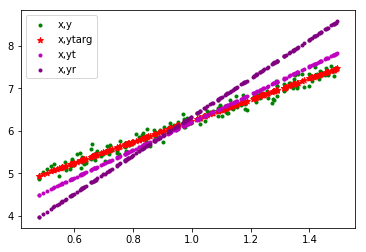

In [11]:
%matplotlib inline
plt.scatter(x, y, marker='.', c='g', label='x,y')
plt.scatter(x, ytarg, marker='*', c='r', lw=1, label='x,ytarg')
plt.scatter(x, yt, marker='.', c='m', lw=1, label='x,yt')
plt.scatter(x, yr, marker='.', c='purple', lw=1, label='x,yr')
plt.legend()

In [12]:
# Debugging
print('trad       rev')

trad       rev


In [13]:
print(dmt, dmr)
print(dct, dcr)

0.03268383723383612 -0.10004697336980366
-0.03409025627889031 0.09537633082968398


In [14]:
t, r = dyt, dyr
print('delta y')
print('min',t.min(), r.min())
print('max',t.max(), r.max())
print('mean',t.mean(), r.mean())
print('std',t.std(), r.std())

delta y
min -0.5847321095219993 -1.009998708158104
max 0.4958278040369297 1.2267224544906385
mean -0.03409025627889031 0.09537633082968398
std 0.2519459710055438 0.6010326727071533


In [15]:
et, er = dyt**2, dyr**2
print('squared error')
print('min',et.min(), er.min())
print('max',et.max(), er.max())
print('mean',et.mean(), er.mean())
print('std',t.std(), r.std())

squared error
min 8.001362843416349e-06 6.202043655295925e-05
max 0.34191163990604734 1.5048479803515367
mean 0.06463891787908674 0.3703369181440374
std 0.2519459710055438 0.6010326727071533


In [17]:
# it is sure to work for only one point,, for vector ??

In [19]:
yr = mr*x + cr
dyr = yr - y
dcr = dyr.mean()
dcr # >0 means that the y-intercept should be decreased in value, shift it below

0.0967762803108107

In [20]:
dmr = (1/x).T.dot(dyr)/n

In [21]:
dmr_ = np.zeros_like(x)
for i in range(len(x)):
    dmr_[i]=1/x[i]*dyr[i]
dmr_

array([-1.95382116, -2.03934492, -2.02667152, -1.69327984, -1.86697073,
       -2.05810862, -1.22022991, -1.54665538, -1.53438088, -1.90892983,
       -1.47820245, -1.19791447, -1.41281199, -1.11760771, -1.5625223 ,
       -1.44134471, -1.20555216, -1.46231236, -1.27754619, -1.47053677,
       -1.15073044, -1.11046745, -0.98566129, -1.41430425, -0.99697315,
       -1.34456423, -0.87754992, -0.82457841, -0.8419433 , -1.0155552 ,
       -0.95025268, -0.94446267, -1.21114376, -0.70732613, -1.19296887,
       -0.90787315, -0.90094865, -0.7160983 , -0.84707643, -0.68409425,
       -0.85140321, -0.97718724, -0.56925615, -0.90428038, -0.67881242,
       -0.43048015, -0.46518545, -0.29107996, -0.46916478, -0.33800506,
       -0.60641913, -0.38451078, -0.42529081, -0.70562973, -0.53213   ,
       -0.49239608, -0.42801495, -0.42430465, -0.42784438, -0.44106257,
       -0.38340455, -0.36577416, -0.34906186, -0.39072564, -0.49572747,
       -0.57174293, -0.43695788, -0.16782396, -0.22381259, -0.10

In [23]:
dmr_.mean(), dmr

(-0.1015154793106883, -0.10151547931068826)